Artificial Neural Networks <br>
Nikos Periklis Chourdas - tp4774 <br>
nikos.hourdas@gmail.com 

In [30]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn as sk 
import neurolab as neuro



importing data set 

In [31]:

dataset_names = ['Age', 'Year operation', 'Axillary nodes detected', 'Survival status']

datasetOG = pd.read_csv("haberman.data",header= None , names = dataset_names) 

# {debug} check to make sure data is loaded correctly
# print(dataset)

exploring the Dataset 

In [32]:
datasetOG.head(5)

,Age,Year operation,Axillary nodes detected,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


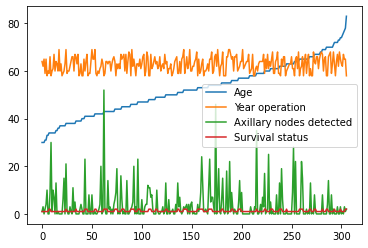

In [33]:
datasetOG.plot()
plt.show()

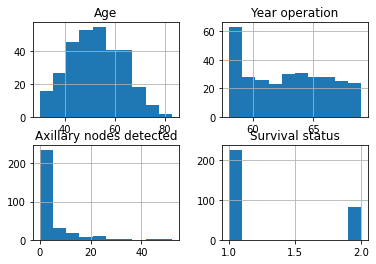

In [34]:
datasetOG.hist()
plt.show()

visualization using scatter plot 

In [35]:
datasetOG.shape

(306, 4)

In [36]:
# Debugging 

# np.shape(dataset)
# print(dataset.columns)

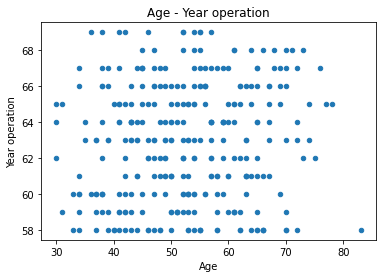

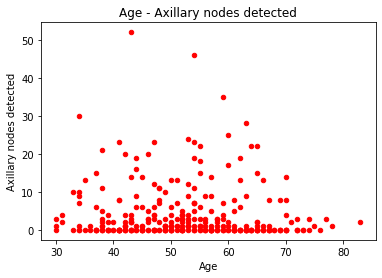

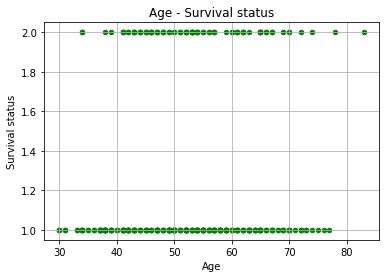

In [37]:


datasetOG.plot(kind = "scatter" , x = "Age" , y = "Year operation", title = "Age - Year operation")

datasetOG.plot(kind = "scatter" , x = "Age" , y = "Axillary nodes detected",color = "red",title = "Age - Axillary nodes detected")

datasetOG.plot(kind = "scatter" , x = "Age" , y = "Survival status",color="green", title = "Age - Survival status")

plt.grid()
plt.show()


Target Transform

In [38]:
temp_Array = datasetOG.values
X= np.array(datasetOG)
T = temp_Array[:,3]

In [39]:
target = np.empty([306,3])

for i in range(len(T)):
    if T[i]==1:
        target[i][0] = 0 
        target[i][1] = 0 
        target[i][2] = 1
    elif T[i]==2:
        target[i][0] = 0
        target[i][1] = 1 
        target[i][2] = 0

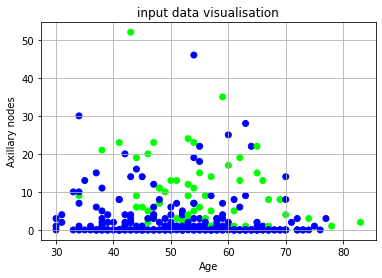

In [40]:
plt.scatter(datasetOG['Age'],datasetOG['Axillary nodes detected'],c = target);
plt.title('input data visualisation')
plt.xlabel('Age')
plt.ylabel('Axillary nodes')
plt.grid(True)
plt.show();

In [41]:
# Debugging 

# print(target)

import libraries for data split 

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [43]:


# starting split rate 80% training data - 20% test set 

Dataset_Train, Dataset_Test , Target_Train , Target_Test = train_test_split(datasetOG,target,test_size = 0.3 , random_state = 43)

Dataset_Train = MinMaxScaler().fit_transform(Dataset_Train)

Dataset_Test = MinMaxScaler().fit_transform(Dataset_Test)

In [44]:
# debug 
# print(Dataset_Train)
# print(Dataset_Test)

network Training 

In [45]:
# Single Layer Perceptron


# print(target)

# net = neuro.net.newp(neuro.tool.minmax(X),1)

# error = net.train(X, target  ,epochs = 1000 , show= 100, lr = 0.005)

# plt.plot(error,'red')
# plt.xlabel('epochchs')
# plt.ylabel('training error')

# plt.grid()
# plt.show()

# try with more epochs and document the results 


as we can see the Perceptron is not suitable for training this network <br>

 feed-forward backpropagation network - newff 
 

In [53]:


# np.random.seed(42)

# 4 input neurons - 3 output neurons 
net = neuro.net.newff(neuro.tool.minmax(X),[4,3])

# # print(len(net.layers))

net.layers[-1].transf = neuro.trans.LogSig()  #output layer 
net.layers[0].transf = neuro.trans.LogSig() #hidden layer 
net.layers[1].transf = neuro.trans.LogSig() #hidden layer 
# # max number of layers allowed to use 

# train neuron
error = net.trainf = neuro.train.train_rprop(net,Dataset_Train,Target_Train , epochs=1000 , show = 10 , lr = 0.3 , goal = 0.000005 )


Epoch: 10; Error: 0.06683004368653908;
The goal of learning is reached


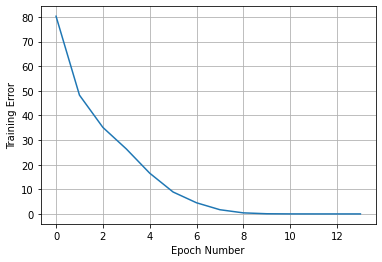

In [55]:
# display graph of training error 
plt.plot(error)
plt.xlabel("Epoch Number")
plt.ylabel("Training Error")
plt.grid(True)
plt.show()
